<h1> Dataset <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> The definition of attrition is in Oxford’s English dictionary defined as: <br> <i><b> "The gradual reduction of a workforce by employees leaving and not being replaced rather than by redundancy." </i></b>

The chosen business case for this course is based on the dataset “Employee Attrition”, which consists of 35 columns and approximately 1400 rows of data about an organization’s employees. 
The dataset is found on the website “Kaggle.com” in a notebook. The goal of this business case is to find patterns in the data using analysis that can tell us why workers quit their job. Moreover the dataset consists of labeled data, which makes it very relevant to perform classification training and prediction on the data using R programming language.
</h4>

<h1> Business problem <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> 
The business question we want to answer in this project is based on the attrition data and interest in the issue of employees leaving their jobs. This knowledge is relevant for the company as a strong decision foundation to either prevent employees from leaving or start a hiring process. Out concrete problem-question is therefore as follows:

<b><br><i>To what extent do employees in a company quit their jobs based on parameters such as distance from home, monthly salary and job satisfaction?</i></b>

In the following we further describe how we are planning to give an answer to the question above. As our dataset contains many columns we have chosen to select the most relevant ones and tried to build a model that is able to somewhat accurately define attrition based on those chosen parameters. The purpose of this would be vital in a company setting as an organization can prepare for workforce loss by using data similar to our dataset about their employees.
</h4>

<h1> Loading the data<h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> 
The data we are using in this project is the attrition-dataset from Kaggle.com and to do further analysis in R, we are loading the into our notebook. Luckyly the dataset has the the format type .csv which enable us to easyly load the data, using the read.csv function. 


<h4>

In [121]:
# git_url <- "https://github.com/Hammi007/R_bigdata/blob/3e35e40e35a28f7e460bac125f9b63384c1cc4f3/Employee_Attrition.csv"
# data <- read.csv(git_url, header = TRUE, stringsAsFactors = FALSE)
df <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)


<h1> Exploring the basics of the dataset <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> 

To get a better understanding of the data, we have chosen to do a light exploration using four different R functions: dim, str, unique, is.na.
The reason we conduct this basic exploration is to gain quick insights about the structure of the data.

Using the <b>dim()</b>, we see that the dataset contains 1470 rows and 35 coloumns.
Through the <b>str()</b> function we see the different datatypes and can conclude that, only two datatypes are used: int and chr.
This also applies for columns with binary output e.g. 'Attrition' with "yes"/"no" values, or columns a few multiple values e.g. BusinessTravel with three diffent values.  

Using the <b>is.na()</b> we also see, that there are no missing values "NA", we have to take in consideration. 

<h4>

In [122]:
dim(df)
str(df)
unique(df$BusinessTravel)
table(is.na(df))

[1] 1470   35

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

[1] "Travel_Rarely"     "Travel_Frequently" "Non-Travel"


FALSE 
51450 

<h1> Cleaning the data <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> After exploring the overall structure of the data, we want to conduct the following transformation-steps: <br><br>
    <i>
        Step 1: Remove irrelevant columns<br>
        Step 2: Remove quotation ("") from the dataset <br>
        Step 3: Transforming columns whith binary and a multiple values to factors.<br> 
    <i>
<h4>

In [123]:
#Step 1: Keeping a selection of relevant columns
selection <- c(
    "Age", "Attrition", "BusinessTravel", "DistanceFromHome",
    "EducationField", "EnvironmentSatisfaction", "Gender", "HourlyRate",
    "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus",
    "MonthlyIncome", "NumCompaniesWorked", "OverTime", "RelationshipSatisfaction", # nolint
    "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",	"YearsInCurrentRole", # nolint
    "YearsSinceLastPromotion"
)
df <- df[selection]

#Step 2,3: Converting multivalues to factors and remvoving quotation ""
df$Attrition <- factor(df$Attrition, levels = c("Yes", "No"), labels = c("Yes", "No")) # nolint
df$BusinessTravel <- factor(df$BusinessTravel, levels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), # nolint
                            labels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"))# nolint
df$EducationField <- factor(df$EducationField, levels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), # nolint
                            labels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources")) # nolint
df$EnvironmentSatisfaction <- factor(df$EnvironmentSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$Gender <- factor(df$Gender, levels = c("Male", "Female"), labels = c("Male", "Female")) # nolint
df$JobInvolvement <- factor(df$JobInvolvement, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$JobRole <- factor(df$JobRole, levels = c("Sales Executive","Research Scientist","Laboratory Technician", # nolint
                                            "Manufacturing Director","Healthcare Representative","Manager","Sales Representative", # nolint
                                            "Research Director","Human Resources"), # nolint
                     labels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources")) # nolint
df$JobSatisfaction <- factor(df$JobSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$MaritalStatus <- factor(df$MaritalStatus, levels = c("Single","Married","Divorced"), labels = c("Single","Married","Divorced")) # nolint
df$OverTime <- factor(df$OverTime, levels = c("Yes", "No"), labels = c("Yes", "No")) # nolint
df$RelationshipSatisfaction <- factor(df$RelationshipSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$TrainingTimesLastYear <- factor(df$TrainingTimesLastYear, levels = c(0,1,2,3,4,5,6), labels = c(0,1,2,3,4,5,6)) # nolint
#df$WorkLifeBalance <- factor(df$WorkLifeBalance, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE) # nolint


<h2> Visualizing and explporing the data in depth <h2>
<h4 style = "line-height: 200%; font-weight: lighter;"> In this section we are using R-tools to furhter explore the data. Since our business case is havely based on attrition in a company, we will start invenstigating the categorical value 'attrition' <br>
     
<i></b>
<h4>

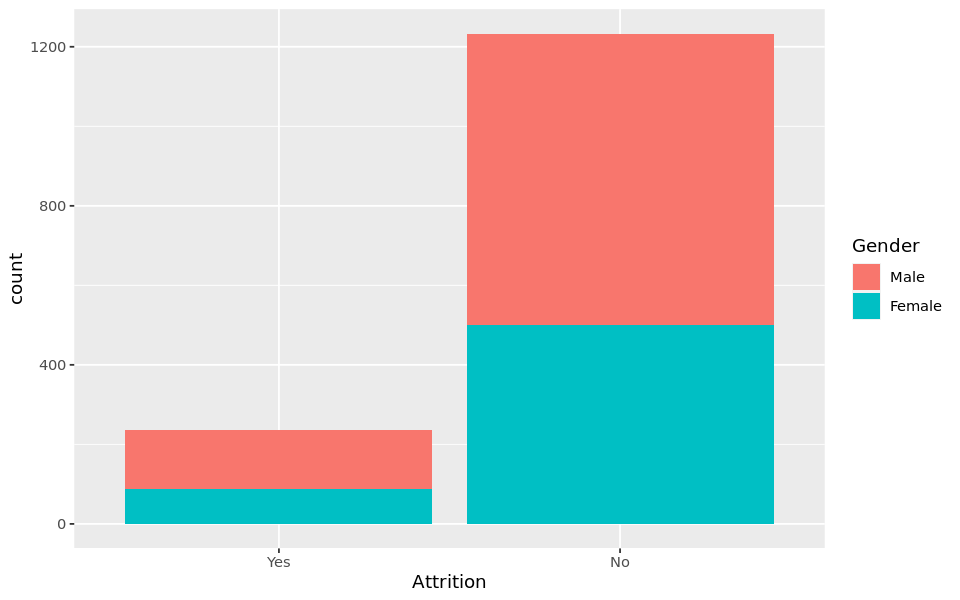

In [124]:
library(tidyverse); library(ggplot2)

options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(df, aes(x = Attrition)) + geom_bar(aes(fill = Gender))

<h4 style = "line-height: 200%; font-weight: lighter;">
Examening the value 'Attrition', we see that there is an imbalance as the majority of data can be found in the category 'no'.<br>

The plot above gives us an idea of what proportions the datasets entirty consists of based on Attrition. <br>We notice a skewness which we will consider in our future interpertations.

Also we will keep in mind the option to under/over sample the dataset for future classification purposes.
<h4>


<h3>In the following we will try to further explore our data by visualizing </h3>
<h4 style = "line-height: 200%; font-weight: lighter;">How does the following parameters influence the attrition:<h4>

<ul style = "">
  <li style = "margin-bottom: 10px;">DistanceFromHome</li>
  <li style = "margin-bottom: 10px;">JobSatisfaction</li>
  <li style = "margin-bottom: 10px;">MonthlyIncome</li>
</ul>


<h4> <b>JobSatisfaction</b><h4>
<h4 style = "line-height: 200%; font-weight: lighter;">In the following we see two visual representations of the Jobsatisfaction of the employees with Attrition: "No" and "Yes"<h4>

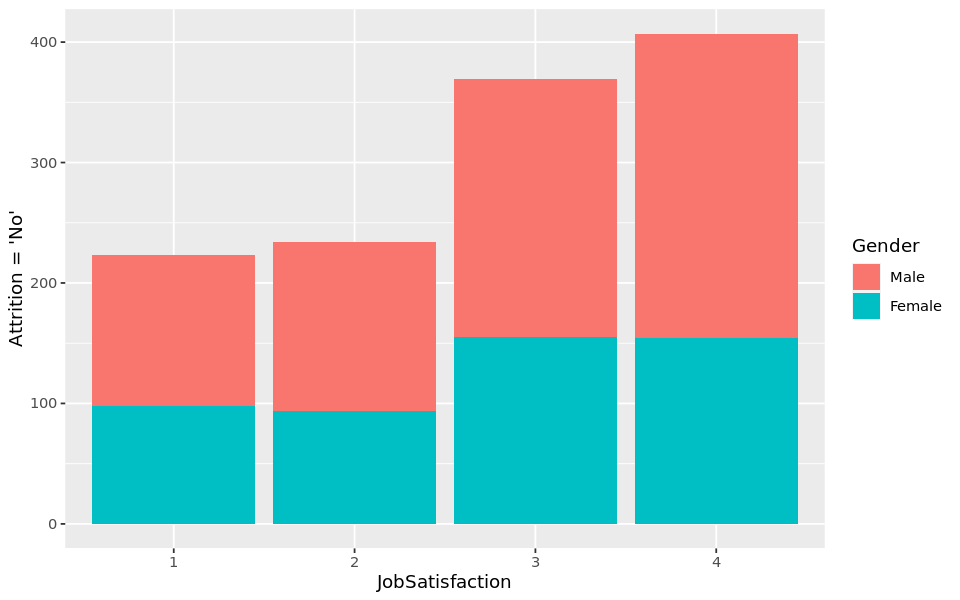

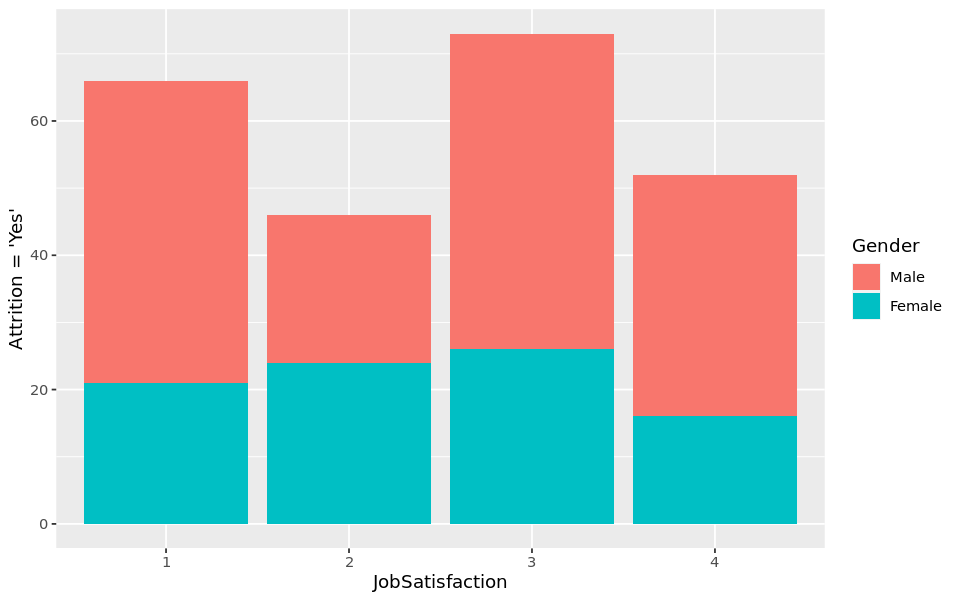

In [125]:
#Filter rows with attrition yes and no respectively:
df_yes <- filter(df, Attrition == "Yes")
df_no <- filter(df, Attrition == "No")

ggplot(df_no, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'") # nolint
ggplot(df_yes, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'") # nolint

<h4><b>DistanceFromHome</b><h4>
<h4 style = "line-height: 200%; font-weight: lighter;">In the following we see two visual representations of the employees DistanceFromHome with Attrition: "No" and "Yes"<h4>

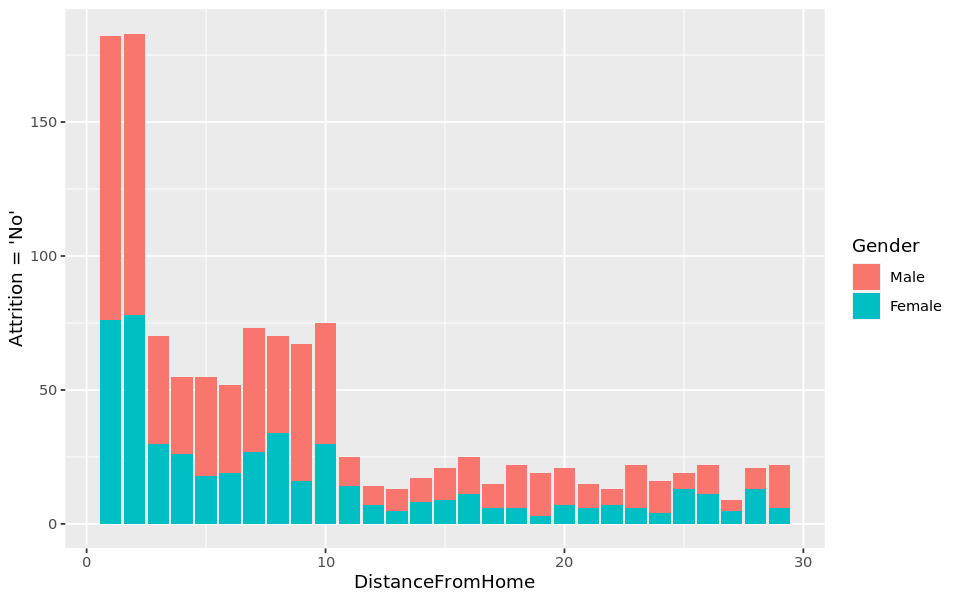

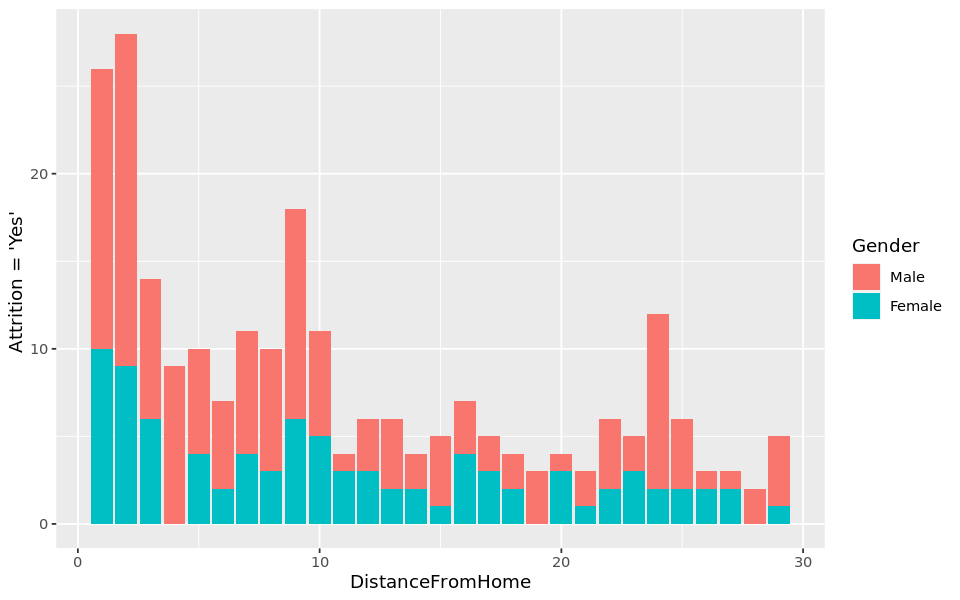

In [126]:
ggplot(df_no, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab(" Attrition = 'No' ") # nolint
ggplot(df_yes, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes' ") # nolint

<h4><b>MonthlyIncome</b><h4> 
<h4 style = "line-height: 200%; font-weight: lighter;">In the following we see two visual representations of the employees MonthlyIncome with Attrition: "No" and "Yes"<h4>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


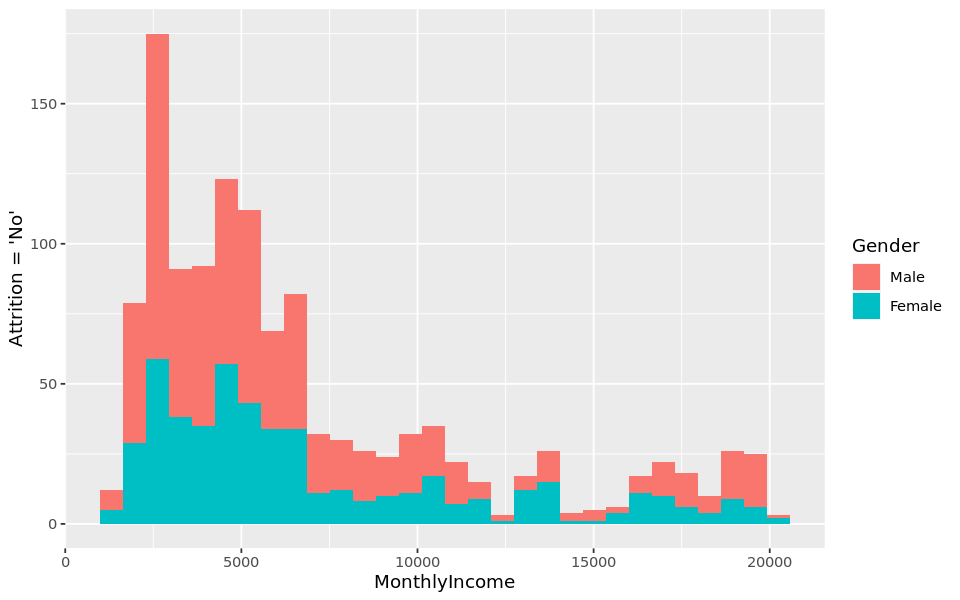

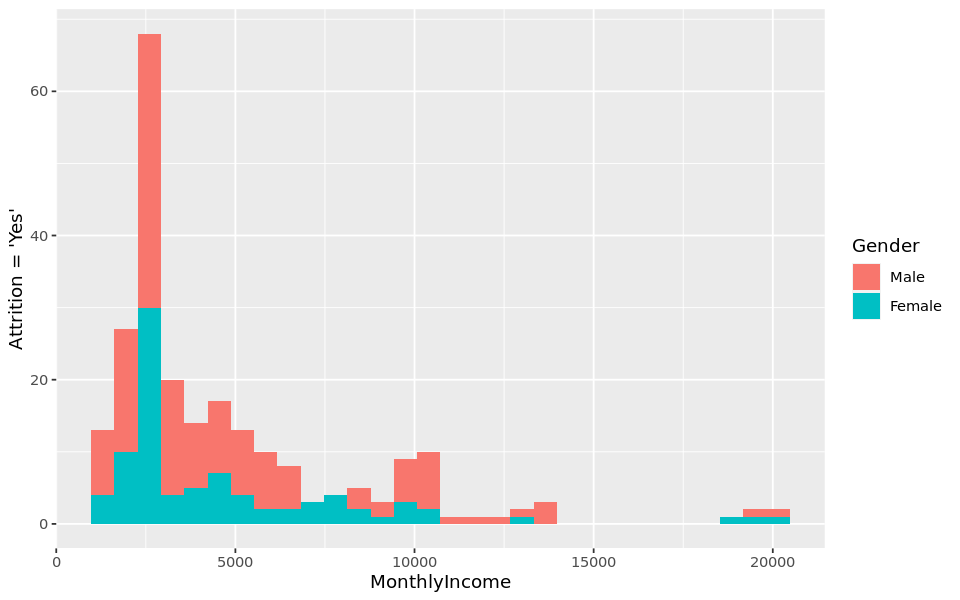

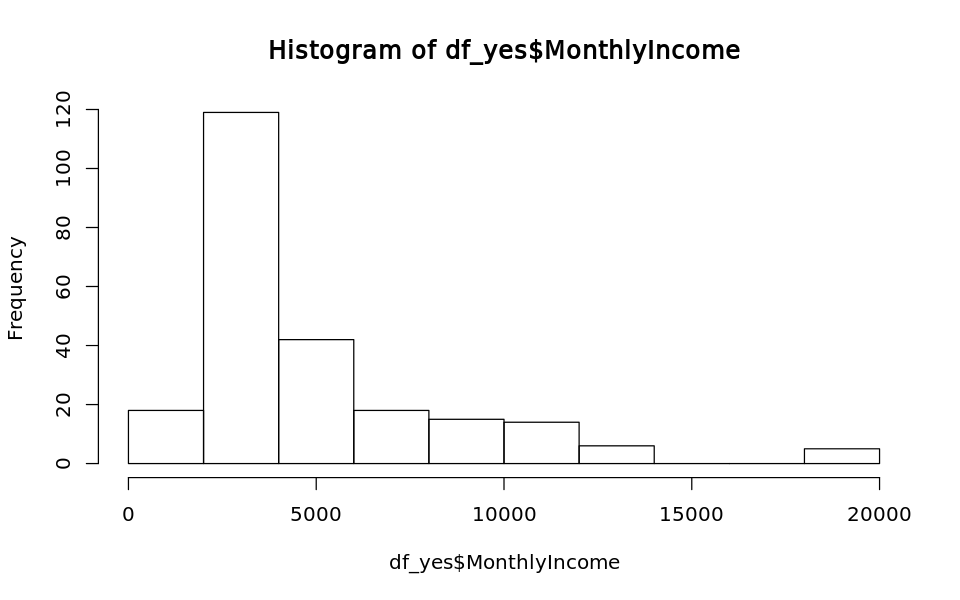

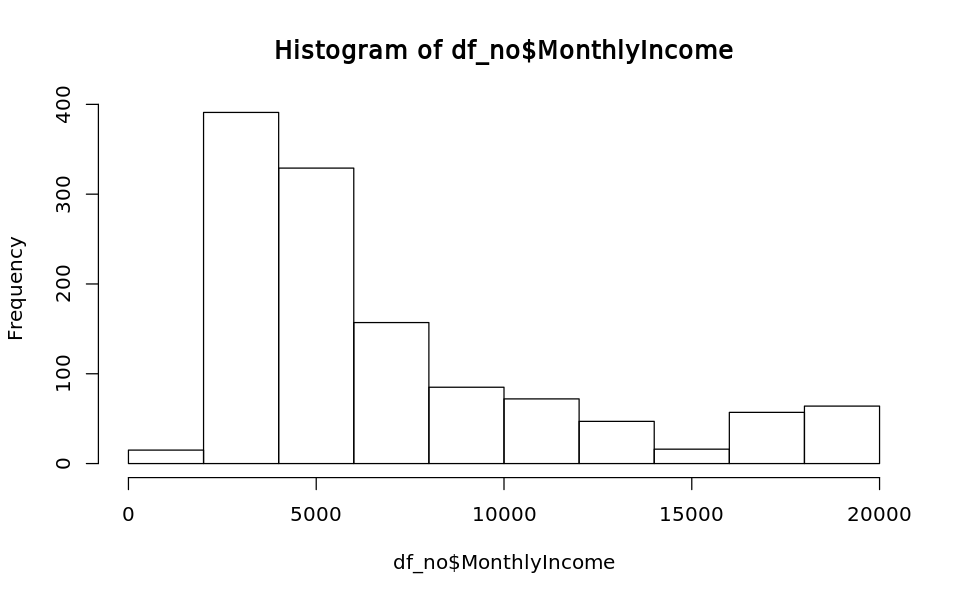

In [127]:
ggplot(df_no) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'No'") # nolint
ggplot(df_yes) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'Yes'") # nolint

hist(df_yes$MonthlyIncome)
hist(df_no$MonthlyIncome)

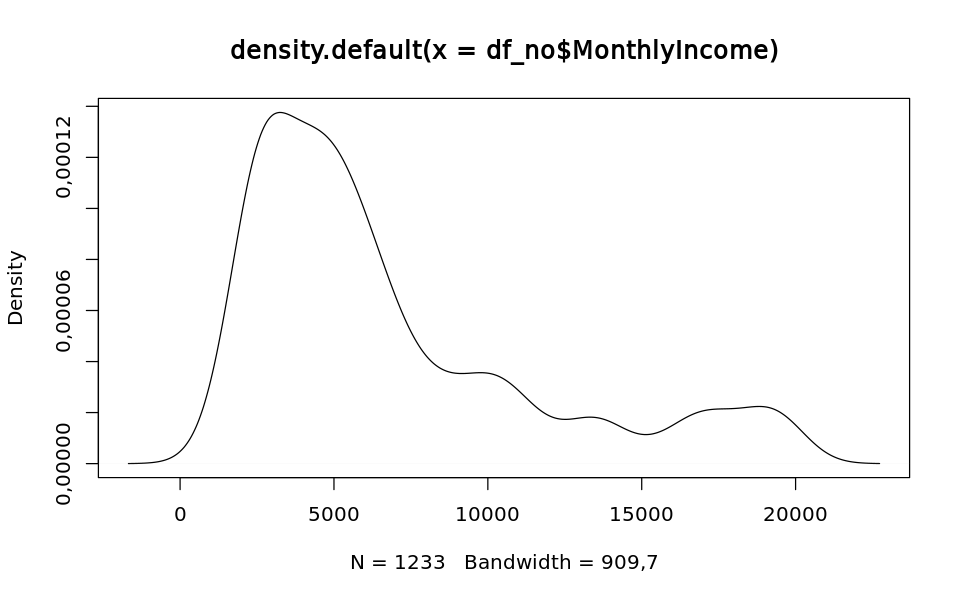

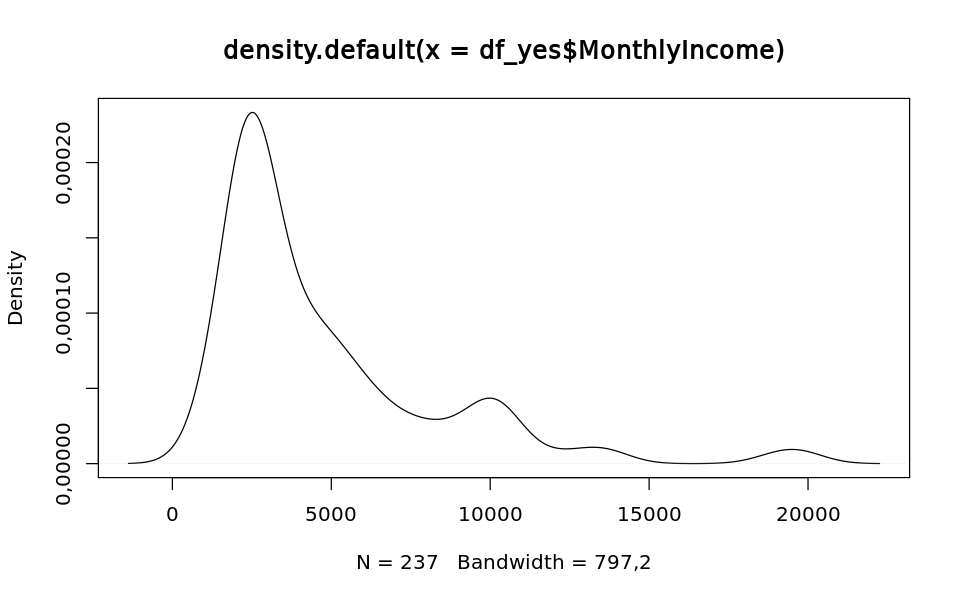

In [128]:
#Simple visualization of the distribution of MonthlyIncome
plot(density(df_no$MonthlyIncome))
plot(density(df_yes$MonthlyIncome))

what do we neeed here?

<h1>Spervised learning - Classification<h1>
<h4 style = "line-height: 200%; font-weight: lighter;">
Supervised learning is a technique used in data science to use labeled data in order to learn to predict labels on similar data that is unseen by a given model. Supervised learning generalizes based on known labels about certain data and automates decision making processes based on predictions. Supervised learning consists of a training and testing process, where training is the phase of generating a model and testing is the process of applying the model to new unseen data also known as a test sample. The following will use supervised learning in order to attempt to give an answer to the business problem since the dataset includes labeled data.

<h4>

<h1>Train and test split<h1>
<h4 style = "line-height: 200%; font-weight: lighter;">
Train and test split
Train and test split prepares our data for classification training as we need to train a classifier on a training sample and then test its ability to predict on a training sample that the model has not yet seen. For the train and test split we use the following code in R programming language:

<h4>
    

In [129]:
# Installing the package
#install.packages("caTools")    # For Logistic regression
#install.packages("ROCR")       # For ROC curve to evaluate model   
# Loading package
library(caTools)

#Balancing data: (undersampling)
yes <- which(df$Attrition == "Yes")
no <- which(df$Attrition == "No")
no <- sample(no, length(yes))
df2 <- df[c(no,yes),] 
df2

#Converting Yes and No to 1 and 0:
df2$Attrition <- ifelse(df2$Attrition == "Yes", 1, 0)

#Train/test split and Classification:
split <- sample.split(df, SplitRatio = 0.7)
   
train_reg <- subset(df2, split == "TRUE")
test_reg <- subset(df2, split == "FALSE")

,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1216,35,No,Travel_Frequently,2,Medical,1,Male,79,2,Research Scientist,...,Single,4930,0,Yes,3,6,2,5,4,1
1279,36,No,Travel_Rarely,10,Life Sciences,4,Male,90,3,Healthcare Representative,...,Married,8321,7,Yes,4,15,1,12,8,5
302,18,No,Travel_Rarely,10,Medical,4,Female,69,2,Sales Representative,...,Single,1200,1,No,1,0,2,0,0,0
735,22,No,Travel_Rarely,8,Life Sciences,2,Male,94,1,Laboratory Technician,...,Married,2451,1,No,1,4,3,4,3,1
179,46,No,Travel_Rarely,1,Marketing,2,Female,92,3,Sales Executive,...,Divorced,10453,1,No,3,24,2,24,13,15
1405,42,No,Non-Travel,23,Life Sciences,4,Male,37,2,Research Scientist,...,Single,4332,1,No,4,20,2,20,9,3
1343,34,No,Travel_Rarely,4,Life Sciences,3,Male,64,3,Sales Executive,...,Married,9713,2,Yes,4,9,3,5,3,1
1357,41,No,Travel_Rarely,8,Marketing,3,Female,54,3,Sales Executive,...,Married,4393,5,No,3,14,3,5,4,1
258,40,No,Travel_Rarely,2,Medical,1,Male,49,3,Research Director,...,Divorced,19436,0,No,4,22,5,21,7,3
1386,34,No,Travel_Rarely,13,Medical,4,Male,39,3,Sales Executive,...,Divorced,8628,1,No,3,9,2,8,7,1


<h4 style = "line-height: 200%; font-weight: lighter;">
This section displays the operations conducted to train a batch of the dataset in order to later predict attrition based on parameters provided about a given employee. The following code initiates classification training of a logistic regression classifier:

<h4>

In [130]:
logistic_model <- glm(Attrition ~.,
                      data = train_reg,
                      family = "binomial")
   
# Summary
summary(logistic_model)


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train_reg)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3,09183  -0,55523  -0,01964   0,53561   2,70451  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       5,4007268  1,8908494   2,856 0,004287 ** 
Age                               0,0059515  0,0264364   0,225 0,821881    
BusinessTravelTravel_Frequently   1,1687258  0,4444379   2,630 0,008547 ** 
BusinessTravelNon-Travel         -0,5948198  0,6933425  -0,858 0,390947    
DistanceFromHome                  0,0583414  0,0221419   2,635 0,008416 ** 
EducationFieldOther               0,9710252  0,8952165   1,085 0,278063    
EducationFieldMedical             1,0988392  0,4571978   2,403 0,016242 *  
EducationFieldMarketing           0,5697131  0,6749434   0,844 0,398619    
EducationFieldTechnical Degree    1,3804231  0,6404743   2,155 0,031137 *  
EducationFieldHuman Resour

<h4 style = "line-height: 200%; font-weight: lighter;">
After acquiring a fully trained model, prediction is performed on the test batch data, whereafter these predictions accuracy is calculated. These operations are performed using the following code in R programming:
<h4>

In [131]:
# Predict test data based on model
predict_reg <- predict(logistic_model,
                       test_reg, type = "response")
predict_reg


1216          735         1357          803         1323         1294 
0,9420377137 0,9371859713 0,0149910183 0,0233817674 0,0147857901 0,5074760667 
         198          316          146           28         1442          216 
0,0402629603 0,7190587554 0,0485675197 0,0706022880 0,0010206126 0,0026532854 
         445          927          619         1093          731          173 
0,3141053585 0,5424674282 0,7352369452 0,1106927674 0,0116107856 0,7568286933 
        1081          271         1431         1318          852           75 
0,0018498594 0,4814379548 0,0071497915 0,4121502616 0,0024659857 0,1874245461 
        1432          233          520          751          522           83 
0,0275639622 0,5797405668 0,4022880107 0,6019552729 0,0224128367 0,0738310513 
        1407         1156         1304         1209         1188          210 
0,7131426656 0,0099051112 0,6334736383 0,3927952668 0,0947644752 0,0075804958 
          60         1063          867         1121          822          926 
0,0218905459 0,9779921389 0,7268607915 0,4338426222 0,0971448139 0,3528000721 
        1056          925           10         1088          485          606 
0,2104293424 0,1593900517 0,0557350065 0,9920800021 0,0861049830 0,0240652560 
         154          239         1064         1016          624         1450 
0,3682138962 0,7729098302 0,0082478467 0,1942181847 0,2376671646 0,6827173690 
        1194         1129          848          189          898         1114 
0,6151892543 0,8770445176 0,0334489891 0,0496586058 0,0656030031 0,1292968829 
          11          640         1196          784         1293          676 
0,5642214891 0,3942616959 0,0059532843 0,1249943473 0,0619767439 0,7986613972 
         833          795          195          845          224           62 
0,0549141150 0,3321296941 0,4562493478 0,1891150454 0,0832058848 0,9423107275 
        1091         1303          618          151          692         1173 
0,1139196160 0,9606149175 0,2814920642 0,9309037396 0,8816527609 0,8275040614 
         591            3           25           27           37           90 
0,0004703292 0,7838427683 0,8617283363 0,9996813193 0,9598734131 0,1484928940 
         101          112          128          141          172          193 
0,1911469017 0,9859406379 0,9799756014 0,9911949180 0,9980839648 0,9297277358 
         218          230          240          272          294          297 
0,3055258105 0,5199954885 0,5891809643 0,1858791760 0,8522565744 0,4174718289 
         328          371          379          406          423          440 
0,3021172795 0,7638505995 0,8282886985 0,9374772023 0,2169899015 0,6033042252 
         441          458          496          505          526          563 
0,9960028719 0,9922124321 0,1847345466 0,7400050860 0,7445352570 0,5511154999 
         574          586          596          646          657          664 
0,7519565990 0,5927060688 0,1351885330 0,9224045661 0,9782556748 0,4031264704 
         684          694          696          710          745          749 
0,9655891366 0,6757051773 0,9581122558 0,9821683465 0,4606651880 0,9942735448 
         762          780          792          793          799          832 
0,7133358594 0,9604468767 0,9455386279 0,9816755124 0,9973039558 0,9084755110 
         837          850          872          914          916          940 
0,1374160767 0,9463166018 0,1964915423 0,7914823439 0,8963451652 0,2929971871 
         967          976          986         1013         1032         1033 
0,5748106246 0,9806869567 0,6582326646 0,9856682293 0,0978267881 0,8616841470 
        1040         1078         1084         1111         1154         1172 
0,5799146205 0,7423240794 0,1482671861 0,6476787497 0,9960917737 0,9316506888 
        1187         1206         1247         1250         1263         1282 
0,9542867489 0,5030152241 0,4460817231 0,9803541556 0,9924736721 0,7159040169 
        1298         1299         1327         1355       

<h4 style = "line-height: 200%; font-weight: lighter;">
One method of indicating a classification accuracy is by using the area under curve method. Area under curve [AUC] is a technique used to visually represent the accuracy of a classifier's predictions. The larger the area under the curve the higher is the accuracy of the classifier. In the following we use R-programming language to create an AUC curve:

<h4>

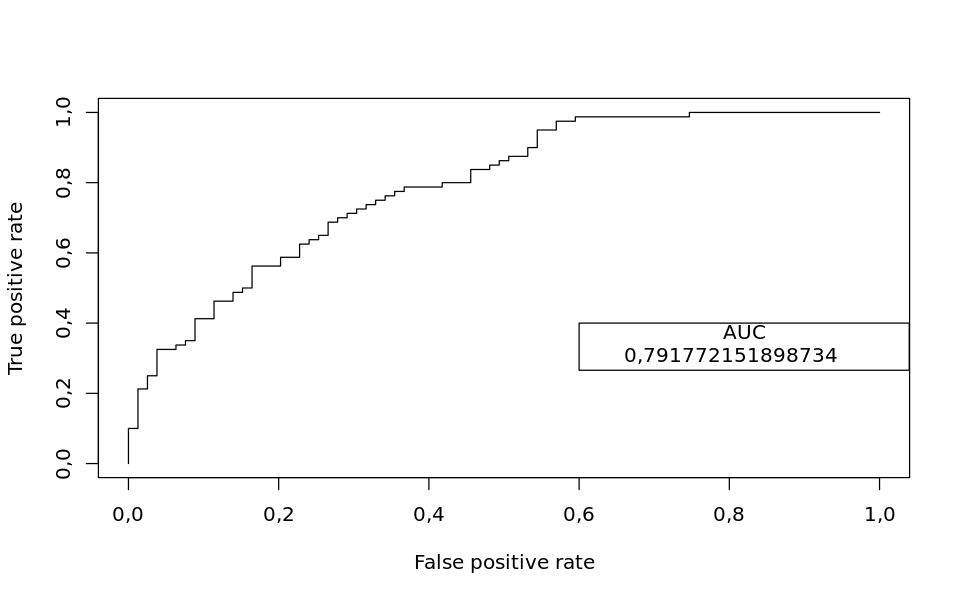

In [132]:
library(ROCR)
# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$Attrition)
ROCPer <- performance(ROCPred, measure = "tpr",
                             x.measure = "fpr")
   
auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
   
# Plotting curve
plot(ROCPer)


legend(.6, .4, auc, title = "AUC", cex = 1)


<h4 style = "line-height: 200%; font-weight: lighter;">
The figure above takes the raw output from the classification predictions and visualizes the area under the curve.In order to calculate the accuracy of the predictions we use thresholding to define “yes” and “no” predictions as the predictions before thresholding are values between 0 and 1, where values closer to 1 indicate “yes” and values close to 0 indicate “no” for attrition.
<h4>

<h4 style = "line-height: 200%; font-weight: lighter;"> 
The following code outputs the following, 
where the accuracy as well as a confusion matrix for the trained classifier can be observed based on the predictions on the test batch.
<h4>


In [133]:
# Threshholding:
predict_reg <- ifelse(predict_reg > 0.5, 1, 0)
   
# Evaluating model accuracy
table(test_reg$Attrition, predict_reg)

missing_classerr <- mean(predict_reg != test_reg$Attrition)
print(paste('Accuracy =', 1 - missing_classerr))


   predict_reg
     0  1
  0 54 25
  1 21 59

[1] "Accuracy = 0,710691823899371"


<h3>Conclusion - supervised<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
    The accuracy shown on figure 10 tells us that the trained logistic regression classifier is able to predict the test sample with an accuracy of 72%. The confusion matrix gives us insight into how many predictions for each class “Yes” and “No” were falsely or correctly identified.

We can conclude that in a given situation where a company is in possession of the same dataset we used in this project, the company can use supervised learning and classification for decision making regarding attrition with an approximately 72% chance of success. One could argue however that a larger dataset or a fewer parameter selection could result in a more representative and accurate model.

<h4>

<h3>Unsupervised learning - clustering<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
Unsupervised learning is a technique used in data science to contract information about data without any given label classes. A popular form of unsupervised learning is clustering, where clusters are created without any prior knowledge of each cluster's meaning. The clusters are created based on similarities between data objects according to the characteristics in the data, and grouping similar data objects into clusters.

Even though we are aware that our labeled dataset makes it relevant to work with classification, we still have an interest in performing a form of unsupervised learning such as clustering in order to explore the information we can acquire about the data without the usage of the labels.

For this purpose we firstly chose the columns “Age” and  “MonthlyIncome”. We chose these two columns because of our previous knowledge about monthly income from the exploratory data analysis chapter as well as the fact that we wanted to keep the clustering two-dimensional for visualization purposes. 

We noticed that the values in age and monthly income for the company employees have a scaling problem. The problem arises because monthly income values are considerably larger than age. Therefore the impact of the age column will not be noticable in the clustering and the data in question needs to be scaled - The impact of scaling will be shown later in the chapter. For this purpose we conduct a scaling operation to solve this problem. This operation counts a pre-processing operation as it prepares data to be correctly represented in our clustering.

The following figure shows the code that is responsible for this operation:
<h4>


In [134]:
df$scaledAge <- as.numeric(scale(df$Age))
df$scaledIncome <- as.numeric(scale(df$MonthlyIncome))

data <- select(df, scaledAge, scaledIncome)
summary(data)
scaledData <- data
head(scaledData,3)


   scaledAge        scaledIncome    
 Min.   :-2,0715   Min.   :-1,1669  
 1st Qu.:-0,7579   1st Qu.:-0,7629  
 Median :-0,1011   Median :-0,3364  
 Mean   : 0,0000   Mean   : 0,0000  
 3rd Qu.: 0,6651   3rd Qu.: 0,3985  
 Max.   : 2,5260   Max.   : 2,8667  

scaledAge,scaledIncome
"0,44619856","-0,1083127"
"1,32191535","-0,2916193"
"0,00834016","-0,9373347"


<h4 style = "line-height: 200%; font-weight: lighter;">
Hereafter we create an elbow graph which is used in clustering for deciding the number of clusters appropriate to have for a given dataset. The code for creating the elbow graph is as follows:
<h4>

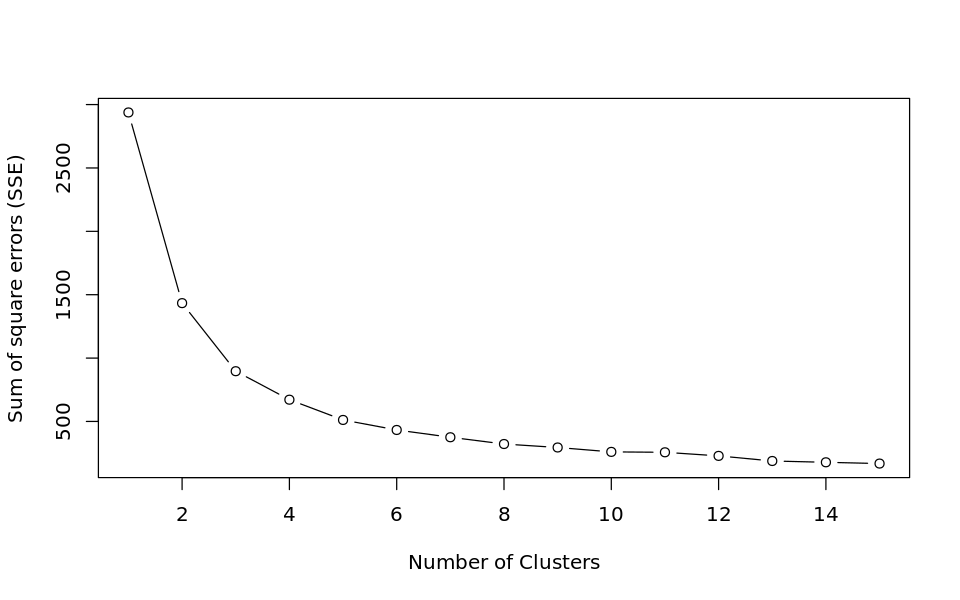

In [135]:
mydata <- scaledData
k_max <- 15
wss <- (nrow(mydata)-1)*sum(apply(mydata, 2, var))
for (i in 2:k_max) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
plot(1:k_max, wss, type="b", xlab="Number of Clusters",
     ylab="Sum of square errors (SSE)")

<h4 style = "line-height: 200%; font-weight: lighter;">
From the information gained from the outputted elbow graph we choose the number of clusters to be 8 because there are no significant changes after the 8nth cluster on the Elbow graph. Thereafter, the following code is executed in order to acquire and visualize the clusters:
    
The code makes use of the unscaled data in order to show the impact of scaling the data for the purpose of clustering. 

The output from the code is as follows:
<h4>

<h4>In the following we can se the impact of not scaling the data:<h4>

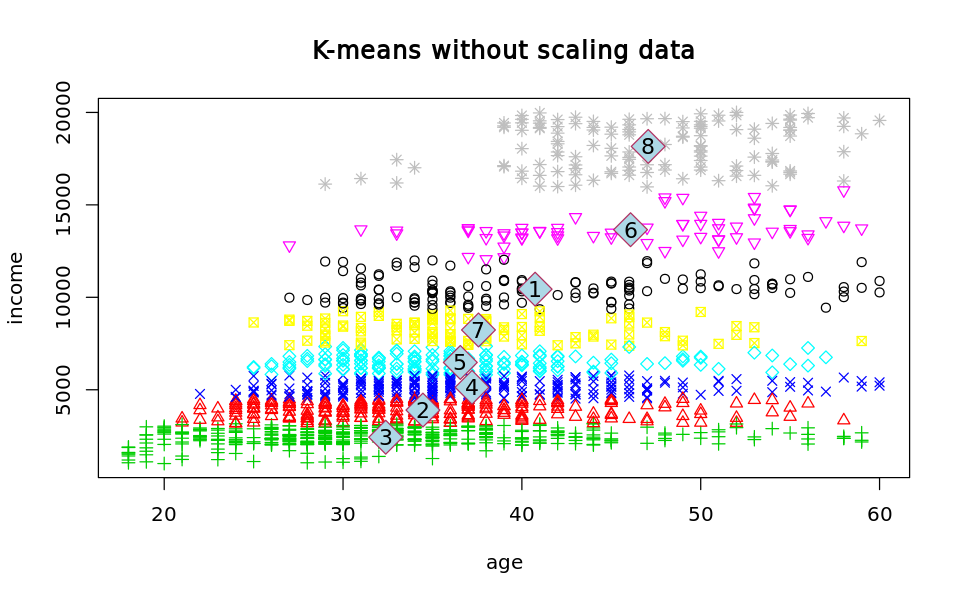

In [138]:
data_unscaled <- select(df, Age, MonthlyIncome)
Kmeans <- kmeans(data_unscaled, 8)

plot(data_unscaled$Age, data_unscaled$MonthlyIncome, col = Kmeans$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = Kmeans$cluster, main = "K-means without scaling data", 
     xlab = "age", ylab = "income")
points(Kmeans$centers[ ,1], Kmeans$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(Kmeans$centers[ ,1], Kmeans$centers[ ,2], cex = 1.1,
     col = 'black', attributes(Kmeans$centers)$dimnames[[1]])


<h4 style = "line-height: 200%; font-weight: lighter;">
The plot displays eight clusters as we chose earlier. We notice that the clusters created are not impacted by the “age” column as the values in the age column are considerably smaller than the ones in the monthly income column.
<h4>    

<h4>In the following we can see the impact of scaling the data:<h4>

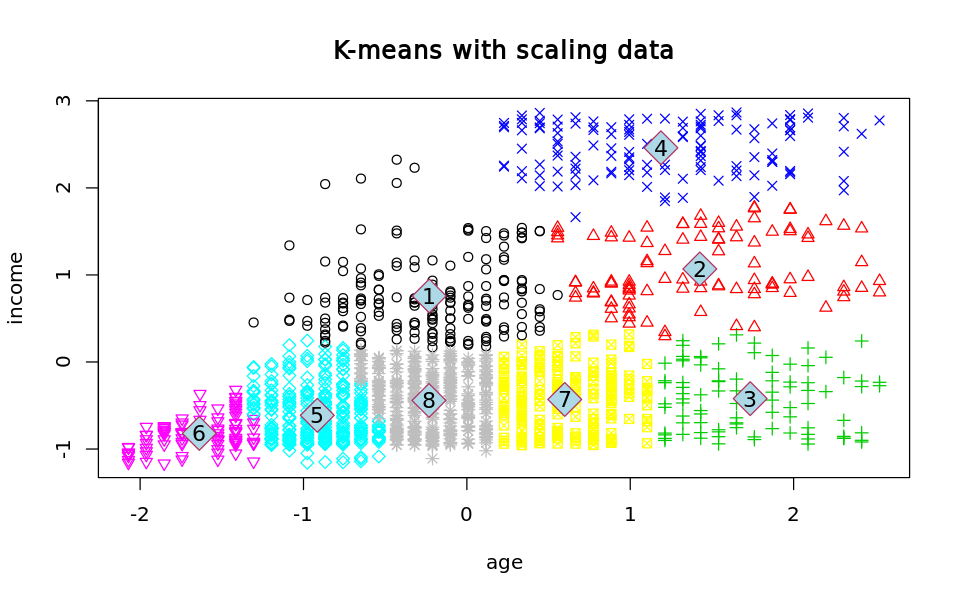

In [139]:
KmeansScaling <- kmeans(scaledData, 8)

plot(scaledData$scaledAge, scaledData$scaledIncome, col = KmeansScaling$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = KmeansScaling$cluster, main = "K-means with scaling data", 
     xlab = "age", ylab = "income")
points(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], cex = 1.1,
     col = 'black', attributes(KmeansScaling$centers)$dimnames[[1]])

<h4 style = "line-height: 200%; font-weight: lighter;">
The plot above shows a clear difference in the clustering as a result of the impact of scaling the data. 
<h4>
    
<h3>Conclusion - unsupervised<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
The clustering output gives us insight into the data about the company’s employees based on their age and monthly income. This insight can be used to further investigate how each cluster is more or less likely to have the attrition yes or no. This investigation is beyond the scope of this project but was necessary to mention for the sake of demonstrating an understanding of how unsupervised learning and specifically clustering can be used to answer a question such as the one in this project.
<h4>

<h1>
Discussion
<h1>  
    
<h4 style = "line-height: 200%; font-weight: lighter;">
Dataset quality is very important when dealing with data and especially classification and or clustering. The quality definition is sometimes different based on the goal of the project and the problem that needs solving. For this project the datatset we have chosen was subject to undersampling because of the imbalance of the binary class types namely “Yes” and “No” for attrition. Moreover the size of the dataset has a big impact on the interpretation of the results. For example the classification accuracy we acquired in this project is not representative of how a logistic regression classifier will behave on a larger dataset with the same type of data. The representation would also be more accurate if we are dealing with a larger dataset.
<h4>

<h3>Ethics<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
Is it ethical for a company to use employee data in order to strategically make decisions that will lessen the company’s losses as a result of employees quitting their jobs.  
<h4>